   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  


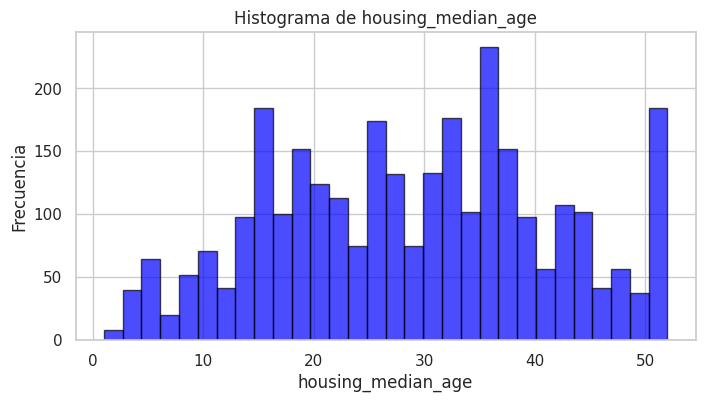

Análisis de la variable housing_median_age:
  - Media: 28.85
  - Mediana: 29.00
  - Moda: 52.00
  - Desviación estándar: 12.56
  - Varianza: 157.64
  - Rango: (1.00, 52.00)
  - IQR: 19.00



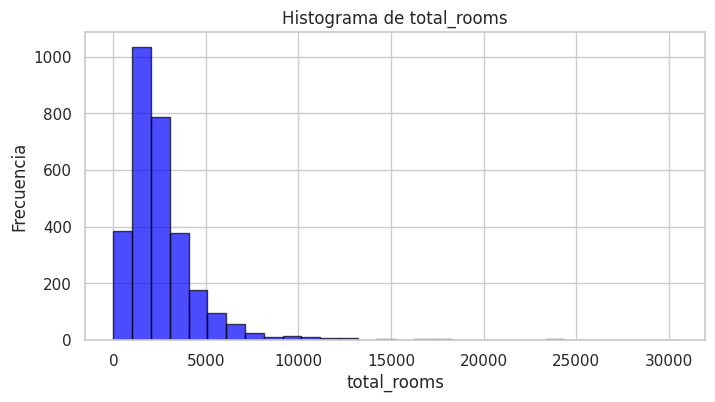

Análisis de la variable total_rooms:
  - Media: 2599.58
  - Mediana: 2106.00
  - Moda: 907.00
  - Desviación estándar: 2155.59
  - Varianza: 4646582.61
  - Rango: (6.00, 30450.00)
  - IQR: 1728.00



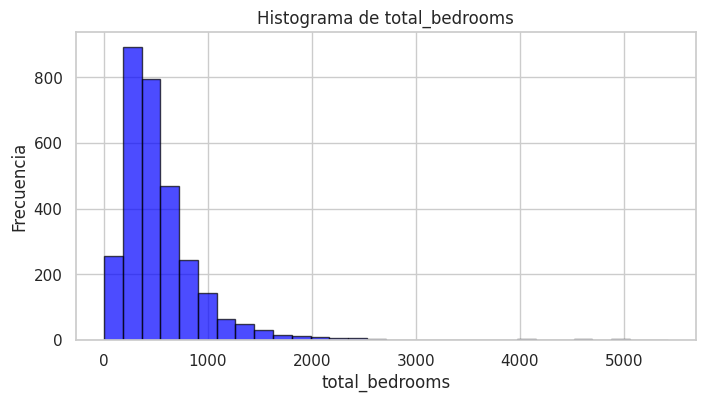

Análisis de la variable total_bedrooms:
  - Media: 529.95
  - Mediana: 437.00
  - Moda: 314.00
  - Desviación estándar: 415.65
  - Varianza: 172768.55
  - Rango: (2.00, 5419.00)
  - IQR: 345.00



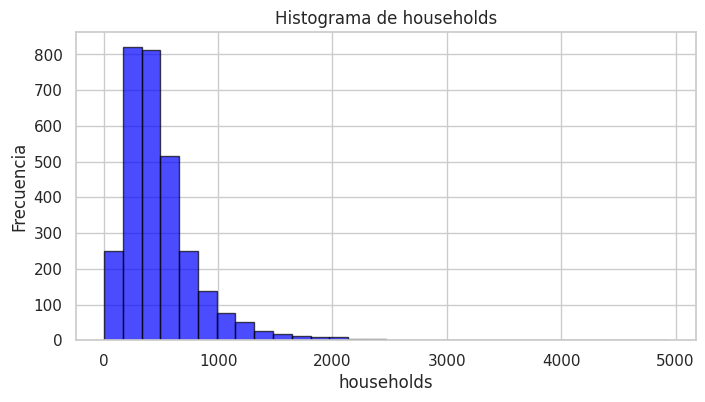

Análisis de la variable households:
  - Media: 489.91
  - Mediana: 409.50
  - Moda: 273.00
  - Desviación estándar: 365.42
  - Varianza: 133533.76
  - Rango: (2.00, 4930.00)
  - IQR: 324.25



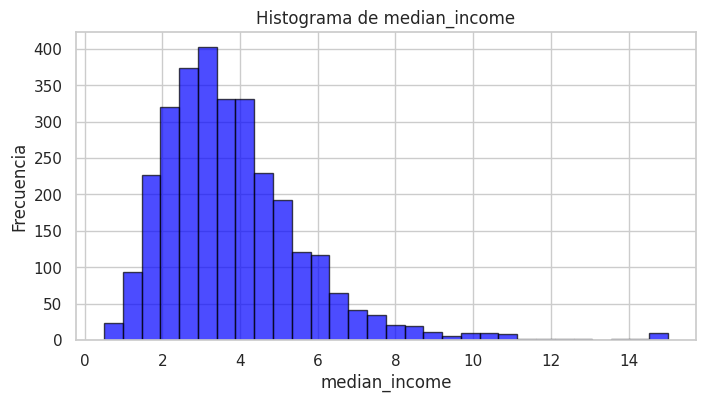

Análisis de la variable median_income:
  - Media: 3.81
  - Mediana: 3.49
  - Moda: 15.00
  - Desviación estándar: 1.85
  - Varianza: 3.44
  - Rango: (0.50, 15.00)
  - IQR: 2.11



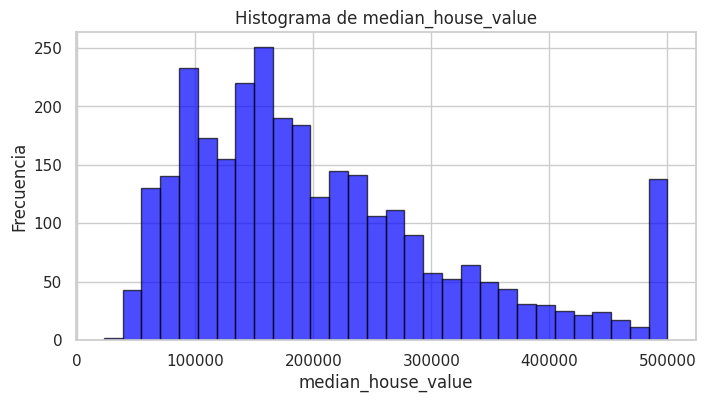

Análisis de la variable median_house_value:
  - Media: 205846.27
  - Mediana: 177650.00
  - Moda: 500001.00
  - Desviación estándar: 113119.69
  - Varianza: 12796063693.23
  - Rango: (22500.00, 500001.00)
  - IQR: 142775.00



In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Cargar el conjunto de datos
# Asegúrate de que el archivo 'california_housing_test.csv' esté en la ruta correcta
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Ver las primeras filas para confirmar la carga
print(df.head())

# -----------------------------------------
# Análisis Univariado
# Variables a analizar:
# housing_median_age, total_rooms, total_bedrooms, households, median_income, median_house_value

univar_vars = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'households', 'median_income', 'median_house_value']

for var in univar_vars:
    # Crear histograma
    plt.figure(figsize=(8,4))
    plt.hist(df[var].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

    # Calcular medidas de centralidad y dispersión
    mean_val = df[var].mean()
    median_val = df[var].median()
    mode_val = df[var].mode()[0]
    std_val = df[var].std()
    var_val = df[var].var()
    min_val = df[var].min()
    max_val = df[var].max()
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1

    # Imprimir resultados
    print(f"Análisis de la variable {var}:")
    print(f"  - Media: {mean_val:.2f}")
    print(f"  - Mediana: {median_val:.2f}")
    print(f"  - Moda: {mode_val:.2f}")
    print(f"  - Desviación estándar: {std_val:.2f}")
    print(f"  - Varianza: {var_val:.2f}")
    print(f"  - Rango: ({min_val:.2f}, {max_val:.2f})")
    print(f"  - IQR: {iqr:.2f}\n")


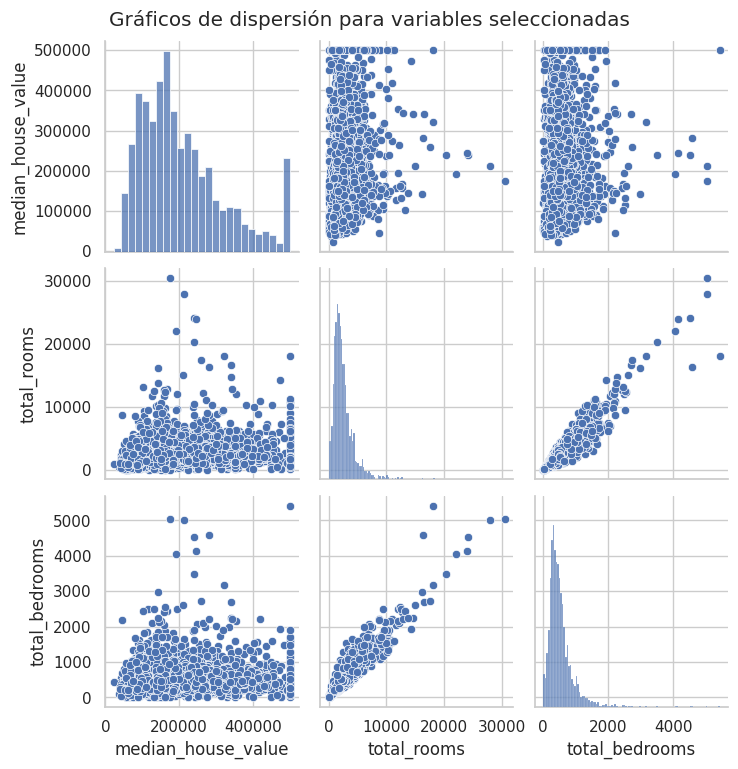

Matriz de correlación:
                    median_house_value  total_rooms  total_bedrooms
median_house_value            1.000000     0.160427        0.082279
total_rooms                   0.160427     1.000000        0.937749
total_bedrooms                0.082279     0.937749        1.000000


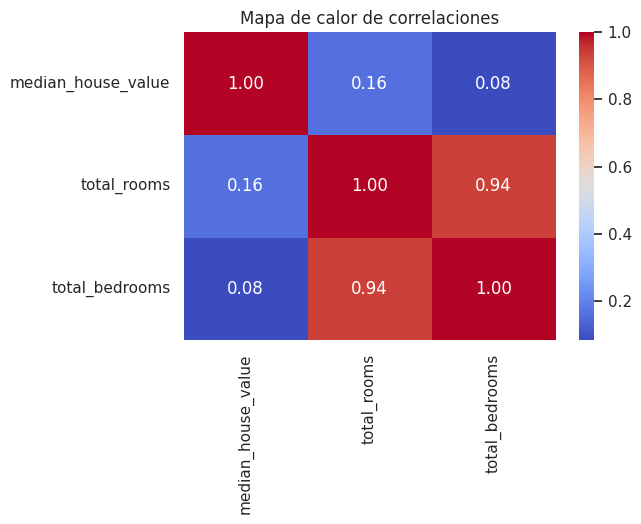

In [2]:
# Variables para análisis bivariado
bivar_vars = ['median_house_value', 'total_rooms', 'total_bedrooms']

# Gráficos de dispersión (pairplot) para observar relaciones entre variables
sns.pairplot(df[bivar_vars])
plt.suptitle('Gráficos de dispersión para variables seleccionadas', y=1.02)
plt.show()

# Cálculo de la matriz de correlación
corr_matrix = df[bivar_vars].corr()
print("Matriz de correlación:")
print(corr_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()
